In [1]:
%load_ext autoreload
%autoreload 2

import tokentango

TokenTango


In [41]:
import torch
from torch.optim import Adam, AdamW
from torch import nn, functional as F
from plotly import express as px
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import torch.nn.utils as nn_utils
import os
import uuid
from sklearn.manifold import TSNE
import math
from plotly import graph_objects as go

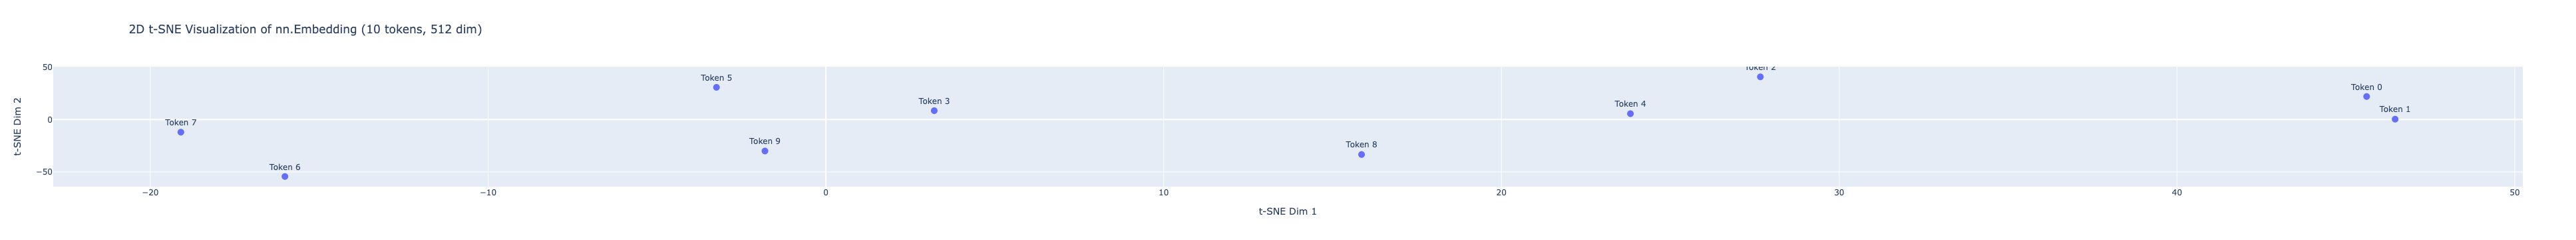

In [30]:
# Step 1: Create the embedding layer
vocab_size = 10  # You can change this to a larger value
embedding_dim = 512
embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

device = torch.device("cpu")
model = tokentango.BertClassifier(6, 10, device).to(device)
model.load_state_dict(torch.load("brute_convergence/3ebf1d5c.pth"))

embedding = model.embeddings

# Step 2: Extract weights
embedding_weights = embedding.weight.detach().numpy()  # Shape: (10, 512)

# Step 3: Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embedding_2d = tsne.fit_transform(embedding_weights)  # Shape: (10, 2)

# Step 4: Plot using Plotly
fig = px.scatter(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    text=[f"Token {i}" for i in range(vocab_size)],
    title="2D t-SNE Visualization of nn.Embedding (10 tokens, 512 dim)",
    labels={"x": "t-SNE Dim 1", "y": "t-SNE Dim 2"}
)

fig.update_traces(marker=dict(size=10), textposition='top center')
fig.show()

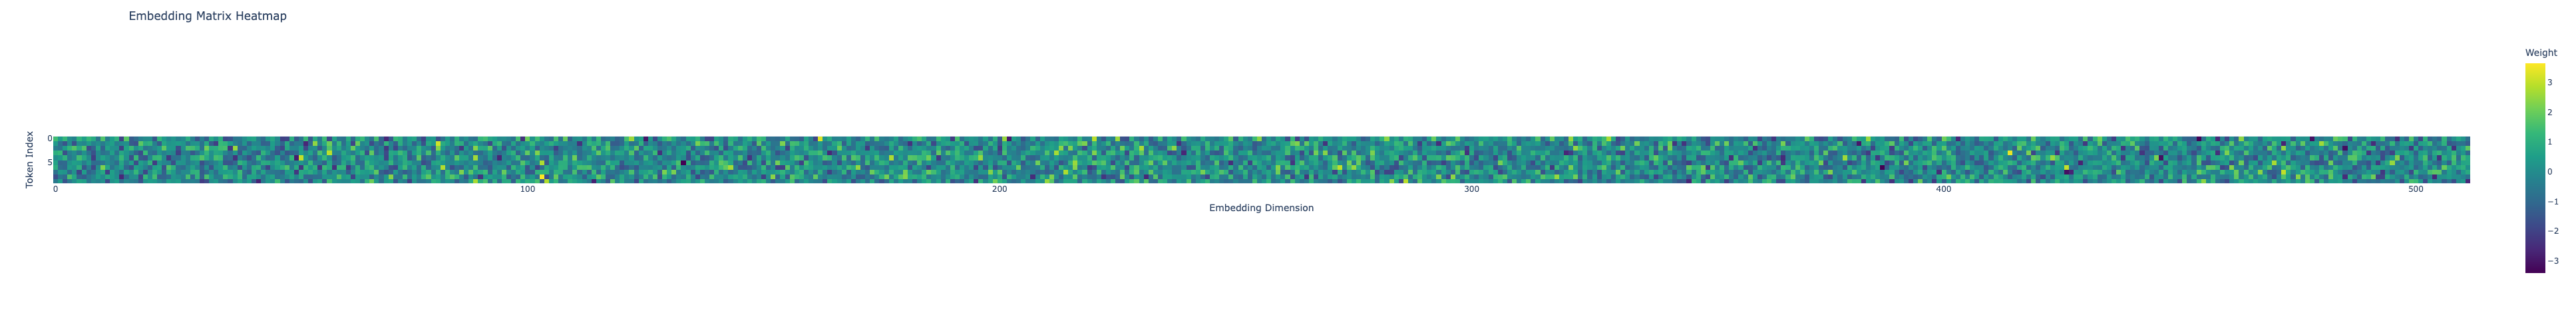

In [33]:
# Step 2: Get embedding weights
embedding_weights = embedding.weight.data.numpy()  # Shape: (vocab_size, embedding_dim)

# Step 3: Create Plotly heatmap
fig = px.imshow(
    embedding_weights,
    labels=dict(x="Embedding Dimension", y="Token Index", color="Weight"),
    x=np.arange(embedding_dim),
    y=np.arange(vocab_size),
    color_continuous_scale="Viridis"
)

fig.update_layout(
    title="Embedding Matrix Heatmap",
    xaxis_title="Embedding Dimension",
    yaxis_title="Token Index",
    height=500,
    width=8000
)

fig.show()

In [32]:
embedding1 = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
embedding2 = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
embedding3 = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

In [22]:
((embedding1.weight - embedding2.weight)**2).sum()

tensor(10329.1582, grad_fn=<SumBackward0>)

In [29]:
embedding.weight

Parameter containing:
tensor([[-0.7305,  0.2239,  0.6706,  ...,  0.9179,  1.6446,  0.5003],
        [ 1.0171,  0.7235, -1.0593,  ...,  0.8063,  0.9083, -0.1820],
        [-1.3444,  0.1833, -1.1392,  ..., -0.1870, -0.3537,  0.6191],
        ...,
        [ 0.2806,  0.5938, -0.4376,  ...,  0.4187, -0.1102,  1.8253],
        [ 1.8323,  0.0043,  0.9974,  ..., -0.5000,  0.4576, -0.1216],
        [-0.9788, -0.9967, -0.9710,  ..., -0.6087,  0.1021, -1.6475]],
       requires_grad=True)

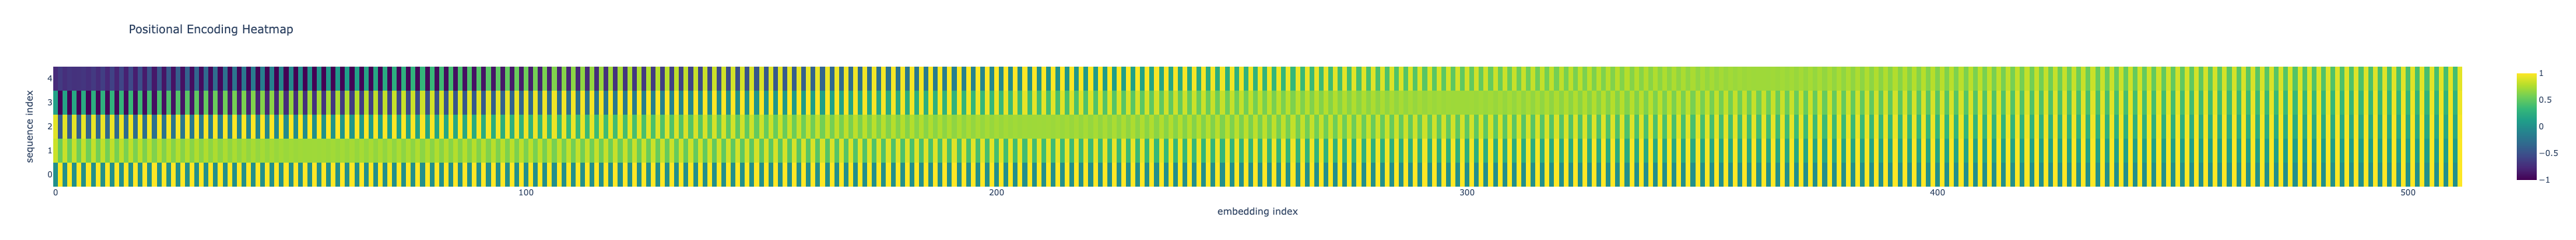

In [64]:
positional_encoding = torch.zeros([5, 512])#, requires_grad=True)
position = torch.arange(0, 5).unsqueeze(1).float()
div_term = torch.exp(torch.arange(0, 512, 2).float() * -(math.log(10.0) / 512))
positional_encoding[:, 0::2] = torch.sin(position * div_term)
positional_encoding[:, 1::2] = torch.cos(position * div_term)

pos_encoding_np = positional_encoding.detach().cpu().numpy()

fig = go.Figure(data=go.Heatmap(
    z=pos_encoding_np,
    colorscale='Viridis',
    showscale=True
))

fig.update_layout(
    title='Positional Encoding Heatmap',
    xaxis_title='embedding index',
    yaxis_title='sequence index'
)

fig.show()

In [63]:
torch.dot(positional_encoding[1, :], positional_encoding[7, :])

tensor(-5.0216)